In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from PIL import Image
import os
import matplotlib.pyplot as plt

In [2]:
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    'dataset_fog/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    'dataset_fog/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')


Found 2622 images belonging to 2 classes.
Found 726 images belonging to 2 classes.


In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [ ]:
# 모델 학습
history = model.fit(
    train_generator,
    steps_per_epoch=2000 // 32,
    epochs=500,
    validation_data=validation_generator,
    validation_steps=800 // 32)

# 그래프 그리기

# 손실 그래프
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], 'b-', label='Training loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 정확도 그래프
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], 'b-', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [25]:
model.save('fog_classifier_1209_epoch_500.h5')  # h5 확장자로 모델 저장

c:\Python\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# load a single image for testing
test_image = tf.keras.preprocessing.image.load_img('fog_test.png', target_size = (150, 150))
# test_image = tf.keras.preprocessing.image.load_img('No_fog_test.jpg', target_size = (150, 150))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

# predict the result
result = model.predict(test_image)

# assuming that the class indices are {0: 'no_fog', 1: 'fog'}
if result[0][0] == 1:
    prediction = '안개 없음'
else:
    prediction = '안개 있음'

print(prediction)


1/1 [==============================] - 0s 16ms/step
안개 있음


In [22]:


# 폴더 안의 모든 이미지를 테스트합니다.
test_folder = 'dataset_fog/test/fog'
test_images = os.listdir(test_folder)

correct = 0
total = len(test_images)

for image_name in test_images:
    image_path = os.path.join(test_folder, image_name)
    test_image = tf.keras.preprocessing.image.load_img(image_path, target_size = (150, 150))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)

    # predict the result
    result = model.predict(test_image)

    # assuming that the class indices are {0: 'fog', 1: 'no_fog'}
    if result[0][0] != 1:
        correct += 1

accuracy = correct / total
print(f"정확도: {accuracy * 100}%")


1/1 [==============================] - 0s 14ms/step
정확도: 99.48849104859335%


C:\Users\rutc0\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rutc0\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rutc0\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rutc0\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50504 (\N{HANGUL SYLLABLE AN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rutc0\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}

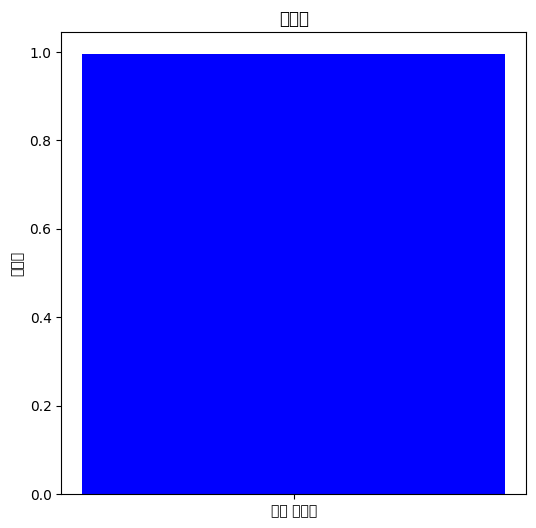

In [23]:
plt.figure(figsize=(6, 6))
plt.title('정확도')
plt.bar(['안개 이미지'], [accuracy], color='blue')
plt.ylabel('정확도')
plt.show()


1/1 [==============================] - 0s 12ms/step
정확도: 99.40298507462687%


C:\Users\rutc0\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\rutc0\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51020 (\N{HANGUL SYLLABLE EUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


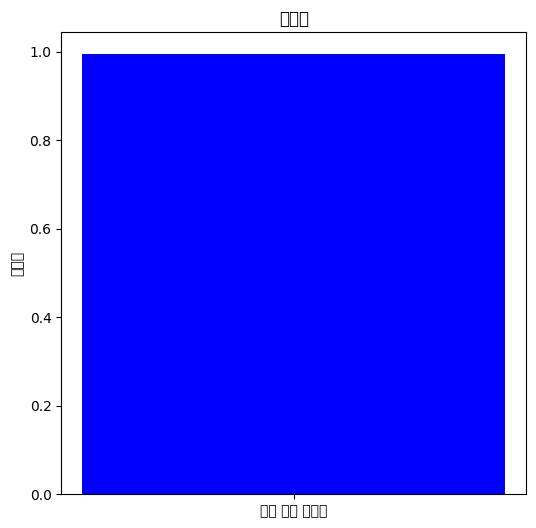

In [24]:

# 폴더 안의 모든 이미지를 테스트합니다.
test_folder = 'dataset_fog/test/no_fog'  # '안개 없음' 이미지가 있는 폴더로 변경
test_images = os.listdir(test_folder)

correct = 0
total = len(test_images)

for image_name in test_images:
    image_path = os.path.join(test_folder, image_name)
    test_image = tf.keras.preprocessing.image.load_img(image_path, target_size = (150, 150))
    test_image = tf.keras.preprocessing.image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)

    # predict the result
    result = model.predict(test_image)

    # assuming that the class indices are {0: 'fog', 1: 'no_fog'}
    if result[0][0] == 1:  # '안개 없음'으로 예측할 경우 correct를 증가
        correct += 1

accuracy = correct / total
print(f"정확도: {accuracy * 100}%")

plt.figure(figsize=(6, 6))
plt.title('정확도')
plt.bar(['안개 없음 이미지'], [accuracy], color='blue')  # '안개 없음 이미지'라는 레이블 추가
plt.ylabel('정확도')
plt.show()
